In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv("./petrol_consumption.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
data.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [5]:
# Separate the features and the target variable
X = data.drop('Petrol_Consumption', axis=1)  # Features
y = data['Petrol_Consumption']  # Target
X.head(), y.head()

(   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)
 0         9.0            3571            1976                         0.525
 1         9.0            4092            1250                         0.572
 2         9.0            3865            1586                         0.580
 3         7.5            4870            2351                         0.529
 4         8.0            4399             431                         0.544,
 0    541
 1    524
 2    561
 3    414
 4    410
 Name: Petrol_Consumption, dtype: int64)

In [6]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split  # for splitting the data
from sklearn.metrics import mean_squared_error  # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor  # for creating the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 4), (10, 4), (38,), (10,))

In [7]:
# Fitting the model to the training dataset
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [8]:
# Calculating the loss after training
y_pred = regressor.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(f'RMSE: {rmse}')

RMSE: 58.072


In [9]:
# Visualizing the decision tree
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='RegressionTree.dot', feature_names=X.columns)

-----------------------分割線-------------------------

In [10]:
import pickle

y_pred = regressor.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)

print(f'RMSE: {rmse}\t train score: {train_score}\t test score: {test_score}')

pickle.dump(regressor, open("petrol_consumption_DT_model.pkl", "wb"))  # save the model

RMSE: 58.072	 train score: 1.0	 test score: 0.21695335574833285


In [11]:
loaded_model = pickle.load(open("petrol_consumption_DT_model.pkl", "rb"))  # load the model
result = loaded_model.score(X_test, y_test)  # test the loaded model
print(result)

0.21695335574833285


-----------------------分割線-------------------------

In [2]:
import graphviz
from sklearn.datasets import load_wine
from sklearn.tree import export_graphviz 
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
X = wine.data
y = wine.target
dtf = DecisionTreeClassifier(criterion="gini",
                              max_depth=3, 
                              max_features="sqrt", 
                              random_state=0)
dtf.fit(X, y)
dtf.score(X, y)

0.9101123595505618

-----------------------分割線-------------------------

score: 0.9101123595505618


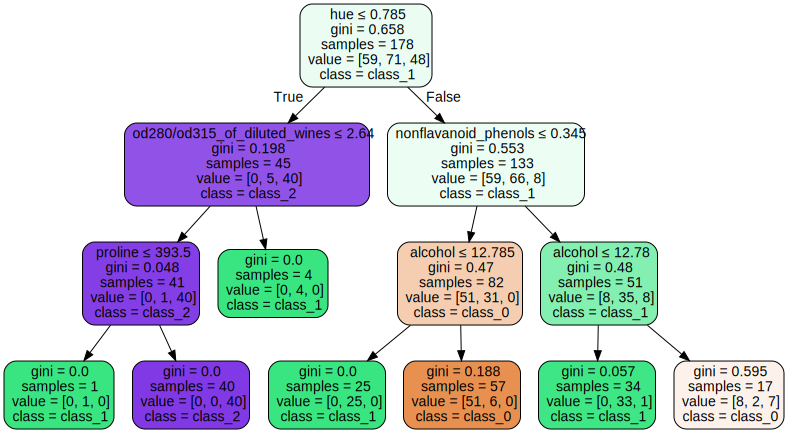

In [7]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import graphviz

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
X = wine.data
y = wine.target
dtf = DecisionTreeClassifier(criterion="gini", max_depth=3, max_features="sqrt", random_state=0)
dtf.fit(X, y)

# Training Decision Tree Classifier model and Calculate score of dtf model training result
print(f"score: {dtf.score(X, y)}")

# Exporting the trained Decision Tree Classifier to a dot file
dot_data = export_graphviz(dtf, out_file=None, feature_names=wine.feature_names,
                           class_names=wine.target_names, filled=True,
                           impurity=True, rounded=True, special_characters=True)

# Creating a graph from dot data and saving it to a file
graph = graphviz.Source(dot_data, format="png")
graph.render("wine_DT_tree")
graph

-----------------------分割線-------------------------

score: 0.9101123595505618


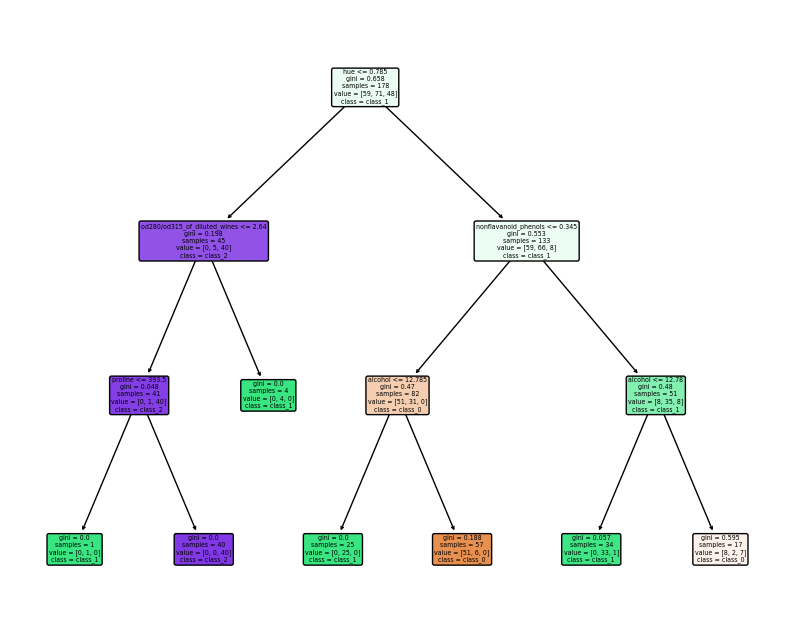

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
X = wine.data
y = wine.target
dtf = DecisionTreeClassifier(criterion="gini", 
                             max_depth=3, 
                             max_features="sqrt", 
                             random_state=0)
dtf.fit(X, y)

print(f"score: {dtf.score(X, y)}")

fig = plt.figure(figsize=(10,8))

plot_tree(dtf, filled=True, 
          feature_names=wine.feature_names, 
          class_names=list(wine.target_names), 
          impurity=True, 
          rounded=True)

plt.show()
fig.savefig("wine_DT_tree_plot.png")

-----------------------分割線-------------------------

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import dtreeviz

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
X = wine.data
y = wine.target
dtf = DecisionTreeClassifier(criterion="gini", 
                             max_depth=3, 
                             max_features="sqrt", 
                             random_state=0)
dtf.fit(X, y)
print(f"score: {dtf.score(X, y)}")

fig = plt.figure(figsize=(10,8))
viz = dtreeviz.model(dtf, X, y, 
                     target_name='wine', 
                     feature_names=wine.feature_names, 
                     class_names=wine.target_names)
v = viz.view()
v.save("wine_DT_tree_dtreeviz.svg")

ModuleNotFoundError: No module named 'matplotlib'